# Load the dataset

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
df=pd.read_csv("Mall_Customers.csv")

In [43]:
df=df.rename(columns = {'Annual Income (k$)' : 'Annual_Income'})

In [44]:
df.head()

,CustomerID,Gender,Age,Annual_Income,Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Visualizations

### Univariate analysis

<AxesSubplot:xlabel='Annual_Income', ylabel='Count'>

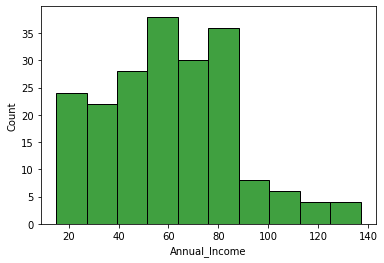

In [46]:
sns.histplot(df["Annual_Income"],color='green')

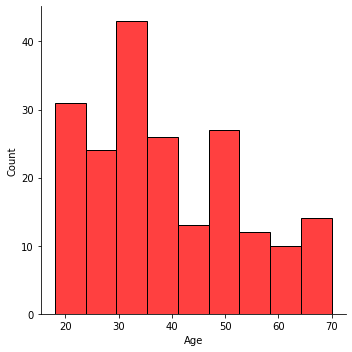

In [47]:
sns.displot(df["Age"],color='red')

### Bivariate analysis

<AxesSubplot:xlabel='Age', ylabel='Gender'>

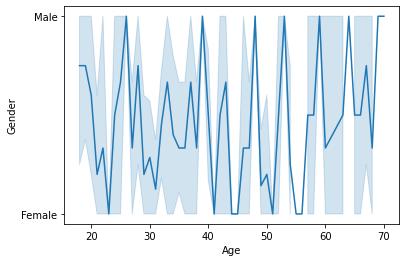

In [7]:
sns.lineplot(y=df.Gender,x=df.Age)

### Multivariate analysis

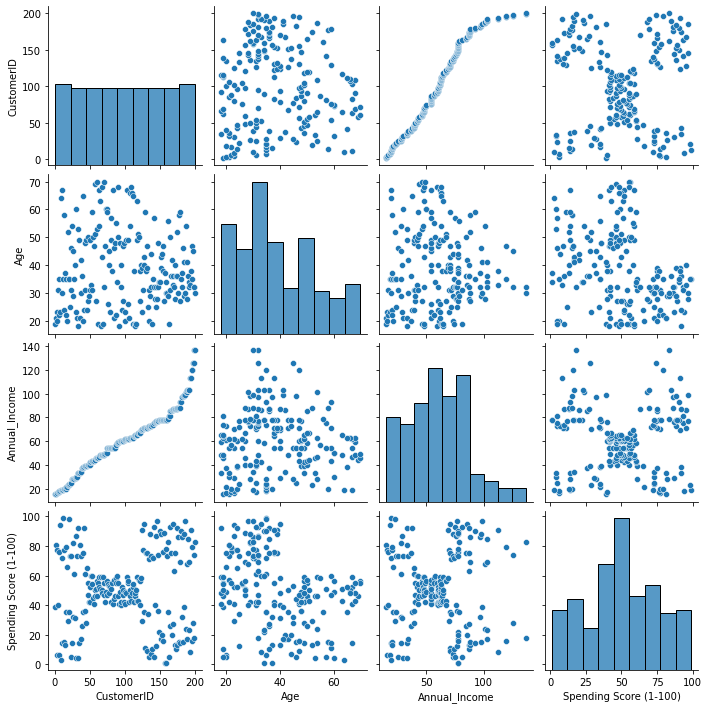

In [48]:
sns.pairplot(data=df[['CustomerID','Age','Annual_Income','Spending Score (1-100)']])

# Performing Descriptive statistics

In [49]:
df[['Annual_Income','Spending Score (1-100)','Age']].mean() 

Annual_Income             60.56
Spending Score (1-100)    50.20
Age                       38.85
dtype: float64

In [50]:
df[['Annual_Income','Spending Score (1-100)','Age']].median()

Annual_Income             61.5
Spending Score (1-100)    50.0
Age                       36.0
dtype: float64

In [51]:
df[['Annual_Income','Spending Score (1-100)','Age']].mode()

,Annual_Income,Spending Score (1-100),Age
0,54,42.0,32.0
1,78,NaN,NaN


# Handling missing values

In [52]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual_Income             0
Spending Score (1-100)    0
dtype: int64

# Identify outliers and replace them

<AxesSubplot:xlabel='Annual_Income'>

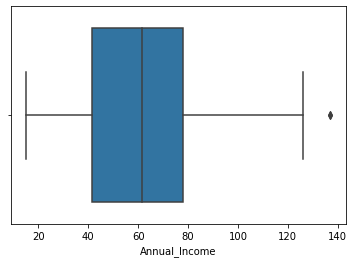

In [53]:
sns.boxplot(x=df['Annual_Income'])

In [38]:
df.head()

,CustomerID,Gender,Age,Annual_Income,Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [56]:
q1 = df.Annual_Income.quantile(0.25)
q2 = df.Annual_Income.quantile(0.75)
IQR = q2 - q1
df=df[~((df.Annual_Income<(q1-1.5*IQR))|(df.Annual_Income>(q2+1.5*IQR)))]
df

,CustomerID,Gender,Age,Annual_Income,Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
193,194,Female,38,113,91
194,195,Female,47,120,16
195,196,Female,35,120,79
196,197,Female,45,126,28


<AxesSubplot:xlabel='Annual_Income'>

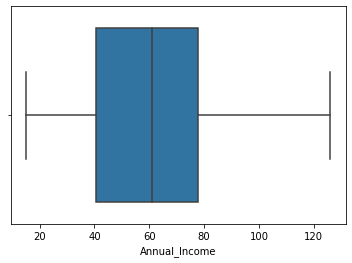

In [58]:
sns.boxplot(x=df['Annual_Income'])

# Checking for categorial columns and perform encoding

In [60]:
df_numeric = df[['CustomerID','Age','Annual_Income','Spending Score (1-100)']]
df_categorical = df[['Gender']]
df_categorical.head()

,Gender
0,Male
1,Male
2,Female
3,Female
4,Female


In [63]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

gender_encoder = OneHotEncoder()
gender_reshaped = np.array(df_categorical['Gender']).reshape(-1, 1)
gender_values = gender_encoder.fit_transform(gender_reshaped)
print(df_categorical['Gender'][:5])
print()
print(gender_values.toarray()[:5])
print()
print(gender_encoder.inverse_transform(gender_values)[:5])

0      Male
1      Male
2    Female
3    Female
4    Female
Name: Gender, dtype: object

[[0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]

[['Male']
 ['Male']
 ['Female']
 ['Female']
 ['Female']]


## Split the data into dependent and independent variables

In [65]:
y = df["Gender"]
x=df.drop(columns=["Gender"],axis=1)
x.head()

,CustomerID,Age,Annual_Income,Spending Score (1-100)
0,1,19,15,39
1,2,21,15,81
2,3,20,16,6
3,4,23,16,77
4,5,31,17,40


# Scaling the independent variables

In [66]:
from sklearn.preprocessing import scale
X_Scale = pd.DataFrame(scale(x), columns=x.columns)
X_Scale.head()

,CustomerID,Age,Annual_Income,Spending Score (1-100)
0,-1.723325,-1.425414,-1.779171,-0.435989
1,-1.705829,-1.282367,-1.779171,1.199413
2,-1.688334,-1.353890,-1.739447,-1.720949
3,-1.670838,-1.139319,-1.739447,1.043661
4,-1.653342,-0.567131,-1.699723,-0.397051


# Build ,Train and test the model

In [69]:
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X_Scale, y, test_size=0.2, random_state=0)
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

In [70]:
model.fit(X_Train,Y_Train)
Y_Predict = model.predict(X_Test)
Y_Predict_Train = model.predict(X_Train)

In [71]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print("Train Accuracy : ",accuracy_score(Y_Train,Y_Predict_Train))
print("Test Accuracy : ",accuracy_score(Y_Test,Y_Predict))

Train Accuracy :  1.0
Test Accuracy :  0.55


## Measuring performance using metrics

In [72]:
print(classification_report(Y_Test,Y_Predict))

              precision    recall  f1-score   support

      Female       0.68      0.58      0.62        26
        Male       0.39      0.50      0.44        14

    accuracy                           0.55        40
   macro avg       0.54      0.54      0.53        40
weighted avg       0.58      0.55      0.56        40

